<a href="https://colab.research.google.com/github/michaelkg114/CustomerAnalysis/blob/main/Copy_of_Customer_Analysis_Elfin%2CKenang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# List of columns to be considered categorical
categorical_columns = ['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Country']

# List of columns to be considered quantitative
quantitative_columns = ['Quantity', 'UnitPrice']

# Create new dataframes for categorical and quantitative columns
categorical_df = df[categorical_columns]
quantitative_df = df[quantitative_columns]

In [ ]:
# Check for null values in the entire dataframe
null_counts = df.isnull().sum()

# Check for null values in specific columns (e.g., CustomerID)
# Replace 'CustomerID' with the column name you want to check
null_in_customer_id = df['CustomerID'].isnull().sum()

# Print the results
print("Null Values in the Entire DataFrame:")
print(null_counts)

print("\nNull Values in CustomerID Column:")
print(null_in_customer_id)

Null Values in the Entire DataFrame:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Null Values in CustomerID Column:
135080


In [ ]:
# Check for zeros in the entire DataFrame
zero_counts = (df == 0).sum()

# Print the columns with zero values and their counts
print("Columns with Zero Values:")
print(zero_counts[zero_counts > 0])

Columns with Zero Values:
UnitPrice    2515
dtype: int64


In [ ]:
# Group by 'InvoiceNo' and 'CustomerID' and check for duplicate rows within each group
duplicate_groups = df[df.duplicated(subset=['InvoiceNo', 'CustomerID'], keep=False)]

# Print the duplicate groups
print("Duplicate Rows (InvoiceNo and CustomerID):")
print(duplicate_groups)

Duplicate Rows (InvoiceNo and CustomerID):
       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  Unit

In [ ]:
# Drop rows with null values in any column
df_cleaned = df.dropna()

# Drop rows where 'Quantity' is zero
df_cleaned = df_cleaned[df_cleaned['Quantity'] != 0]

# Reset the index of the cleaned DataFrame
df_cleaned.reset_index(drop=True, inplace=True)
# Assuming you have a cleaned DataFrame named 'df_cleaned'

# Drop rows where 'UnitPrice' is zero
df_cleaned = df_cleaned[df_cleaned['UnitPrice'] != 0]

# Reset the index of the DataFrame
df_cleaned.reset_index(drop=True, inplace=True)

# Print the cleaned DataFrame
print("DataFrame after dropping nulls and zeros:")
print(df_cleaned)

DataFrame after dropping nulls and zeros:
       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
406784    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
406785    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
406786    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
406787    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
406788    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitP

In [ ]:
# Calculate revenue by multiplying 'Quantity' and 'UnitPrice' columns
df_cleaned['Revenue'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Print the cleaned DataFrame with the new 'Revenue' column
print("Cleaned DataFrame with Revenue Column:")
print(df_cleaned)

Cleaned DataFrame with Revenue Column:
       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
406784    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
406785    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
406786    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
406787    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
406788    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPric

In [ ]:
# Calculate the number of unique customers (unique CustomerIDs)
unique_customers_count = df_cleaned['CustomerID'].nunique()

# Print the result professionally
print("Number of Distinct Customers (CustomerIDs):", unique_customers_count)

Number of Distinct Customers (CustomerIDs): 4371


In [ ]:
# Calculate the number of unique orders (unique InvoiceNos)
unique_orders_count = df_cleaned['InvoiceNo'].nunique()

# Print the result professionally
print("Number of Distinct Orders (InvoiceNos):", unique_orders_count)

Number of Distinct Orders (InvoiceNos): 22186


In [ ]:
# Calculate the number of unique products (unique StockCodes)
unique_products_count = df_cleaned['StockCode'].nunique()

# Print the result
print("Number of Unique Products (StockCodes):", unique_products_count)

Number of Unique Products (StockCodes): 3684


In [ ]:
# Calculate the number of unique descriptions (unique Description values)
unique_descriptions_count = df_cleaned['Description'].nunique()

# Print the result
print("Number of Unique Descriptions:", unique_descriptions_count)

Number of Unique Descriptions: 3896


In [ ]:
# Calculate the total quantity sold
total_quantity_sold = df_cleaned['Quantity'].sum()

# Print the result
print("Total Quantity Sold:", total_quantity_sold)

Total Quantity Sold: 4893004


In [ ]:
# Calculate the average quantity sold
average_quantity_sold = df_cleaned['Quantity'].mean()

# Print the result
print("Average Quantity Sold:", average_quantity_sold)

Average Quantity Sold: 12.028358682265253


In [ ]:
# Convert the "InvoiceDate" column to a datetime data type if it's not already
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# Find the minimum and maximum dates
min_date = df_cleaned['InvoiceDate'].min()
max_date = df_cleaned['InvoiceDate'].max()

# Calculate the number of days in the date range
date_range_days = (max_date - min_date).days

# Extract the years from the date range
start_year = min_date.year
end_year = max_date.year

# Print the results
print("Date Range (Invoice Date):")
print("Start Date:", min_date)
print("End Date:", max_date)
print("Number of Days in the Range:", date_range_days, "days")
print("Years Included in the Range:", start_year, "to", end_year)

Date Range (Invoice Date):
Start Date: 2010-12-01 08:26:00
End Date: 2011-12-09 12:50:00
Number of Days in the Range: 373 days
Years Included in the Range: 2010 to 2011


In [ ]:
# Extract year, month, and day from the "InvoiceDate" column
df_cleaned['Year'] = df_cleaned['InvoiceDate'].dt.year
df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.month
df_cleaned['Day'] = df_cleaned['InvoiceDate'].dt.day

# Create a column for the day of the week (in words)
df_cleaned['DayOfWeek'] = df_cleaned['InvoiceDate'].dt.strftime('%A')

# Create a column for "year-month"
df_cleaned['YearMonth'] = df_cleaned['InvoiceDate'].dt.strftime('%Y-%m')

# Print the DataFrame with the new columns
print("DataFrame with New Date Columns:")
print(df_cleaned)

DataFrame with New Date Columns:
       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
406784    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
406785    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
406786    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
406787    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
406788    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Cus

In [ ]:
# Count the occurrences of each day of the week
day_of_week_counts = df_cleaned['DayOfWeek'].value_counts().reset_index()
day_of_week_counts.columns = ['DayOfWeek', 'Count']

# Sort the DataFrame by day of the week
day_of_week_counts = day_of_week_counts.sort_values(by=['Count'],ascending=False)

# Print the count of orders for each day in order
print("Count of Orders for Each Day of the Week:")
print(day_of_week_counts)

Count of Orders for Each Day of the Week:
   DayOfWeek  Count
0   Thursday  82357
1  Wednesday  70596
2    Tuesday  68107
3     Monday  66376
4     Sunday  63235
5     Friday  56118


In [ ]:
# Calculate the average unit price
average_unit_price = df_cleaned['UnitPrice'].mean()

# Print the result
print("Average Unit Price:", average_unit_price)

Average Unit Price: 3.4608112903741257


In [ ]:
# Calculate the maximum and minimum unit prices
max_unit_price = df_cleaned['UnitPrice'].max()
min_unit_price = df_cleaned['UnitPrice'].min()

# Print the results
print("Maximum Unit Price:", max_unit_price)
print("Minimum Unit Price:", min_unit_price)

Maximum Unit Price: 38970.0
Minimum Unit Price: 0.001


In [ ]:
# Calculate the number of unique countries
unique_countries_count = df_cleaned['Country'].nunique()

# Print the count of unique countries
print("Number of Unique Countries We Sell To:",unique_countries_count)

Number of Unique Countries We Sell To: 37


In [ ]:
# Assuming you have a cleaned DataFrame named 'df_cleaned'

# Calculate the total revenue for each country
country_revenue = df_cleaned.groupby('Country')['Revenue'].sum().reset_index()

# Calculate the percentage of revenue for each country
total_revenue = country_revenue['Revenue'].sum()
country_revenue['Percentage_of_Revenue'] = (country_revenue['Revenue'] / total_revenue) * 100

# Sort the results by percentage of revenue in descending order
country_revenue = country_revenue.sort_values(by='Percentage_of_Revenue', ascending=False)

# Print the countries responsible for the most percentage of revenue
print("Countries Responsible for the Most Percentage of Revenue:")
print(country_revenue[['Country', 'Percentage_of_Revenue']])

Countries Responsible for the Most Percentage of Revenue:
                 Country  Percentage_of_Revenue
35        United Kingdom              81.539997
23           Netherlands               3.429630
10                  EIRE               3.015461
14               Germany               2.671042
13                France               2.370015
0              Australia               1.651520
32           Switzerland               0.671554
30                 Spain               0.659929
3                Belgium               0.492899
31                Sweden               0.440911
19                 Japan               0.425787
24                Norway               0.423653
26              Portugal               0.350115
12               Finland               0.268995
6        Channel Islands               0.242002
9                Denmark               0.226120
18                 Italy               0.203499
7                 Cyprus               0.155978
1                Austria      

In [ ]:
total_rev=df_cleaned["Revenue"].sum()
print("The total Revenue is:$",total_rev)

The total Revenue is:$ 8300065.814


Most Ordered Stock Item per Invoice:
       InvoiceNo StockCode                        Description  Quantity
387386    581483     23843        PAPER CRAFT , LITTLE BIRDIE     80995
36055     541431     23166     MEDIUM CERAMIC TOP STORAGE JAR     74215
301589    573008     84077  WORLD WAR 2 GLIDERS ASSTD DESIGNS      4800
140181    554868     22197               SMALL POPCORN HOLDER      4300
59940     544612     22053              EMPIRE DESIGN ROSETTE      3906


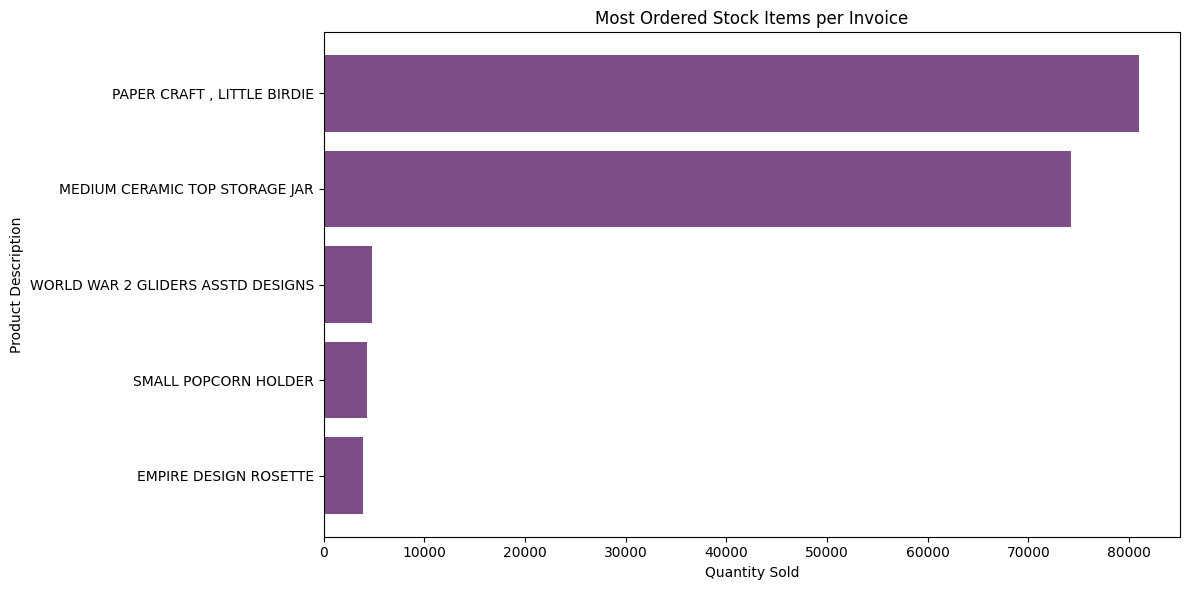

In [ ]:
# Group by 'InvoiceNo' and find the stock item with the highest total quantity ordered per invoice
most_ordered_per_invoice = df_cleaned.groupby(['InvoiceNo', 'StockCode',"Description"])['Quantity'].sum().reset_index()
most_ordered_per_invoice = most_ordered_per_invoice.sort_values(by=['Quantity'], ascending=[False])
most_ordered_per_invoice = most_ordered_per_invoice.drop_duplicates(subset='InvoiceNo', keep='first').head(5)

# Print the result
print("Most Ordered Stock Item per Invoice:")
print(most_ordered_per_invoice[['InvoiceNo', 'StockCode',"Description", 'Quantity']])


colors = plt.cm.viridis(np.linspace(0, 1, len(df)))
# Plotting
plt.figure(figsize=(12, 6))
plt.barh(most_ordered_per_invoice['Description'], most_ordered_per_invoice['Quantity'], color=colors, alpha=0.7)
plt.xlabel('Quantity Sold')
plt.ylabel('Product Description')
plt.title('Most Ordered Stock Items per Invoice')
plt.gca().invert_yaxis()  # Invert the y-axis to display the top item at the top
plt.tight_layout()
plt.savefig("Most Ordered Stock Items per Invoice")

# Display the plot
plt.show()

In [ ]:
# Group by 'InvoiceNo' and 'Description', and find the total quantity ordered for each combination
description_quantities_per_invoice = df_cleaned.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().reset_index()

# Sort the data by 'InvoiceNo' and quantity in descending order
description_quantities_per_invoice = description_quantities_per_invoice.sort_values(by=['Quantity'], ascending=[False])

# Get the top 10 descriptions per invoice using groupby and head
top_10_descriptions_per_invoice = description_quantities_per_invoice.groupby('InvoiceNo').head(10)

# Print the result
print("Top 10 Descriptions per Invoice:")
print(top_10_descriptions_per_invoice[['InvoiceNo', 'Description', 'Quantity']])

Top 10 Descriptions per Invoice:
       InvoiceNo                          Description  Quantity
387282    581483          PAPER CRAFT , LITTLE BIRDIE     80995
36035     541431       MEDIUM CERAMIC TOP STORAGE JAR     74215
301493    573008    WORLD WAR 2 GLIDERS ASSTD DESIGNS      4800
140126    554868                 SMALL POPCORN HOLDER      4300
59912     544612                EMPIRE DESIGN ROSETTE      3906
...          ...                                  ...       ...
394514   C570556     PINK BLUE FELT CRAFT TRINKET BOX     -2592
390502   C550456   FAIRY CAKE FLANNEL ASSORTED COLOUR     -3114
387771   C536757  ROTATING SILVER ANGELS T-LIGHT HLDR     -9360
388710   C541433       MEDIUM CERAMIC TOP STORAGE JAR    -74215
396536   C581484          PAPER CRAFT , LITTLE BIRDIE    -80995

[157373 rows x 3 columns]



Average Quantity Ordered per Invoice: 220.5446678085279


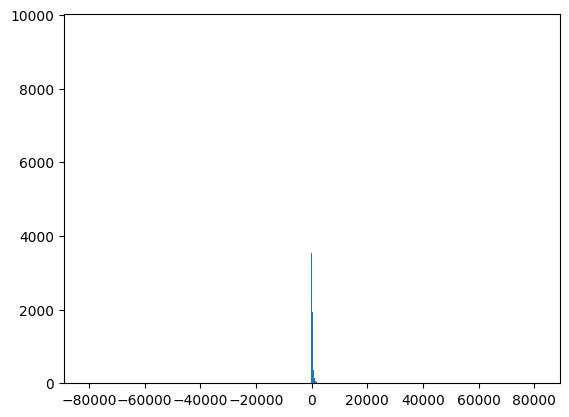

In [ ]:
invoice_total_quantities = df_cleaned.groupby('InvoiceNo')['Quantity'].sum().reset_index()
# Calculate the average quantity ordered across all invoices
average_quantity_ordered = invoice_total_quantities['Quantity'].mean()

print("\nAverage Quantity Ordered per Invoice:", average_quantity_ordered)

plt.hist(invoice_total_quantities['Quantity'],bins=1000)
plt.show()

In [ ]:
# Group by 'InvoiceNo' and calculate the total revenue per invoice
invoice_total_revenue = df_cleaned.groupby('InvoiceNo')['Revenue'].sum().reset_index()

# Calculate the average revenue per invoice
average_revenue_per_invoice = invoice_total_revenue['Revenue'].median()

# Print the result
print("median Revenue per Invoice:", average_revenue_per_invoice)

median Revenue per Invoice: 241.675


In [ ]:
# Calculate the number of invoices per customer
invoices_per_customer = df_cleaned.groupby('CustomerID')['InvoiceNo'].nunique()

# Calculate the average number of invoices per customer
average_invoices_per_customer = round(invoices_per_customer.mean(),2)

# Find the top number of invoices made by a customer
top_invoices_by_customer = invoices_per_customer.max()

# Print the results
print("Average Number of Invoices per Customer:", average_invoices_per_customer)
print("Top Number of Invoices Made by a Customer:", top_invoices_by_customer)

Average Number of Invoices per Customer: 5.08
Top Number of Invoices Made by a Customer: 248


In [ ]:
# Group by 'Country' and count the unique invoices
most_invoices_by_country = df_cleaned.groupby('Country')['InvoiceNo'].nunique().reset_index()

# Sort the results in descending order to find the country with the most invoices
most_invoices_by_country = most_invoices_by_country.sort_values(by='InvoiceNo', ascending=False)

# Get the country with the most invoices (top row)
most_invoices_country = most_invoices_by_country.iloc[0]

# Print the result
print("Country with the Most Invoices:", most_invoices_country['Country'])

Country with the Most Invoices: United Kingdom


In [ ]:
# Check for unique combinations of StockCode and Description
unique_combinations = df_cleaned.groupby('StockCode')['Description'].nunique()

# Print any StockCodes with more than one unique Description
inconsistent_stock_codes = unique_combinations[unique_combinations > 1]

# Print the result
print("StockCodes with Inconsistent Descriptions:")
print(inconsistent_stock_codes)

StockCodes with Inconsistent Descriptions:
StockCode
20622     2
20725     2
20914     2
21109     2
21112     2
         ..
85184C    2
85185B    2
90014A    2
90014B    2
90014C    2
Name: Description, Length: 213, dtype: int64


In [ ]:
# Group by 'StockCode' and calculate the total quantity sold for each stock code
stockcode_total_quantity = df_cleaned.groupby('StockCode')['Quantity'].sum().reset_index()

# Find the stock code with the most quantity sold
most_sold_stockcode = stockcode_total_quantity.loc[stockcode_total_quantity['Quantity'].idxmax()]

# Find the name (description) corresponding to the most sold stock code
most_sold_stockcode_description = df_cleaned[df_cleaned['StockCode'] == most_sold_stockcode['StockCode']]['Description'].values[0]

# Print the result
print("Stock Code with the Most Quantity Sold:", most_sold_stockcode['StockCode'])
print("Name (Description) of the Most Sold Stock Code:", most_sold_stockcode_description)

Stock Code with the Most Quantity Sold: 84077
Name (Description) of the Most Sold Stock Code: WORLD WAR 2 GLIDERS ASSTD DESIGNS


In [ ]:
# Group by 'StockCode' and calculate the total revenue generated for each stock code
stockcode_total_revenue = df_cleaned.groupby('StockCode')['Revenue'].sum().reset_index()

# Find the stock code with the most revenue generated
most_revenue_stockcode = stockcode_total_revenue.loc[stockcode_total_revenue['Revenue'].idxmax()]

# Find the name (description) corresponding to the stock code with the most revenue
most_revenue_stockcode_description = df_cleaned[df_cleaned['StockCode'] == most_revenue_stockcode['StockCode']]['Description'].values[0]

# Find the total revenue generated by the most revenue stock code
most_revenue_stockcode_total_revenue = most_revenue_stockcode['Revenue']

# Print the result
print("Stock Code with the Most Revenue Generated:", most_revenue_stockcode['StockCode'])
print("Name (Description) of the Most Revenue Stock Code:", most_revenue_stockcode_description)
print("Total Revenue Generated by the Most Revenue Stock Code:$", most_revenue_stockcode_total_revenue)

Stock Code with the Most Revenue Generated: 22423
Name (Description) of the Most Revenue Stock Code: REGENCY CAKESTAND 3 TIER
Total Revenue Generated by the Most Revenue Stock Code:$ 132870.4


In [ ]:
# Group by 'StockCode' and calculate the maximum unit price for each stock code
stockcode_max_unit_price = df_cleaned.groupby('StockCode')['UnitPrice'].max().reset_index()

# Find the stock code with the highest unit price
highest_unit_price_stockcode = stockcode_max_unit_price.loc[stockcode_max_unit_price['UnitPrice'].idxmax()]

# Find the highest unit price
highest_unit_price = highest_unit_price_stockcode['UnitPrice']

# Print the result
print("Stock Code with the Highest Unit Price:", highest_unit_price_stockcode['StockCode'])
print("Highest Unit Price:", highest_unit_price)

Stock Code with the Highest Unit Price: M
Highest Unit Price: 38970.0


In [ ]:
# Group by 'StockCode' and 'Description', and calculate the total quantity purchased for each stock code
stockcode_description_total_quantity = df_cleaned.groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index()

# Sort the data by total quantity purchased in descending order
top_10_stock_codes_with_description = stockcode_description_total_quantity.sort_values(by='Quantity', ascending=False).head(10)

# Print the top 10 stock codes and their descriptions purchased by customers
print("Top 10 Stock Codes and Descriptions Purchased by Customers:")
print(top_10_stock_codes_with_description[['StockCode', 'Description', 'Quantity']])

Top 10 Stock Codes and Descriptions Purchased by Customers:
     StockCode                         Description  Quantity
2712     84077   WORLD WAR 2 GLIDERS ASSTD DESIGNS     53215
3586    85099B             JUMBO BAG RED RETROSPOT     45066
2818     84879       ASSORTED COLOUR BIRD ORNAMENT     35314
3593    85123A  WHITE HANGING HEART T-LIGHT HOLDER     34147
361      21212     PACK OF 72 RETROSPOT CAKE CASES     33409
1039     22197                      POPCORN HOLDER     30504
1937     23084                  RABBIT NIGHT LIGHT     27094
1314     22492             MINI PAINT SET VINTAGE      25880
1436     22616          PACK OF 12 LONDON TISSUES      25321
857      21977  PACK OF 60 PINK PAISLEY CAKE CASES     24163


In [ ]:
# Group by 'Country', 'StockCode', and 'Description', and calculate the total quantity purchased for each combination
country_stockcode_description_quantity = df_cleaned.groupby(['Country', 'StockCode', 'Description'])['Quantity'].sum().reset_index()

# Sort the data by 'Country' and total quantity purchased in descending order
country_top_1_stock_codes = country_stockcode_description_quantity.sort_values(by=['Country', 'Quantity'], ascending=[True, False]).groupby('Country').head(1)

# Print the top 3 stock codes with descriptions and quantities purchased by country
print("Top 1 Stock Codes with Descriptions and Quantities Purchased by Country:")
print(country_top_1_stock_codes[['Country', 'StockCode', 'Description', 'Quantity']])

Top 1 Stock Codes with Descriptions and Quantities Purchased by Country:
                    Country StockCode                          Description  \
223               Australia     22492              MINI PAINT SET VINTAGE    
681                 Austria     21918     SET 12 KIDS COLOUR  CHALK STICKS   
924                 Bahrain     23076           ICE CREAM SUNDAE LIP GLOSS   
1015                Belgium     21212      PACK OF 72 RETROSPOT CAKE CASES   
1724                 Brazil     21430   SET/3 RED GINGHAM ROSE STORAGE BOX   
1863                 Canada     37370           RETRO COFFEE MUGS ASSORTED   
1975        Channel Islands     21785                         RAIN PONCHO    
2492                 Cyprus     22335       HEART DECORATION PAINTED ZINC    
2848         Czech Republic     22578   WOODEN STAR CHRISTMAS SCANDINAVIAN   
2899                Denmark     21915               RED  HARMONICA IN BOX    
3288                   EIRE     21212      PACK OF 72 RETROSPOT CAKE 

In [ ]:
# Group by 'CustomerID' and calculate the total quantity ordered for each customer
customer_total_quantity_ordered = df_cleaned.groupby('CustomerID')['Quantity'].sum().reset_index()

# Find the customer with the highest total quantity ordered
highest_quantity_customer = customer_total_quantity_ordered.loc[customer_total_quantity_ordered['Quantity'].idxmax()]

# Find the description of the product ordered by the customer with the highest total quantity
description_of_the_product = df_cleaned[df_cleaned['CustomerID'] == highest_quantity_customer['CustomerID']]['Description'].iloc[0]

# Print the result
print("Customer with the Most Quantity Ordered:", highest_quantity_customer['CustomerID'])
print("Total Quantity Ordered by the Customer:", highest_quantity_customer['Quantity'])
print("Description of the Product Ordered:", description_of_the_product)

Customer with the Most Quantity Ordered: 14646.0
Total Quantity Ordered by the Customer: 196143.0
Description of the Product Ordered: PACK OF 12 WOODLAND TISSUES 


In [ ]:
# Group by 'Country' and calculate the total quantity ordered for each country
country_total_quantity_ordered = df_cleaned.groupby('Country')['Quantity'].sum().reset_index()

# Find the country with the most quantity ordered
most_quantity_country = country_total_quantity_ordered.loc[country_total_quantity_ordered['Quantity'].idxmax()]

# Find the description of the product ordered by the customer with the most quantity in that country
most_quantity_country_description = df_cleaned[df_cleaned['Country'] == most_quantity_country['Country']]['Description'].iloc[0]

# Find the top 3 countries by quantity ordered
top_3_countries_by_quantity = country_total_quantity_ordered.sort_values(by='Quantity', ascending=False).head(3)

# Find the descriptions of the products ordered by the top 3 countries
top_3_countries_with_descriptions = []
for index, row in top_3_countries_by_quantity.iterrows():
    country = row['Country']
    description = df_cleaned[df_cleaned['Country'] == country]['Description'].iloc[0]
    top_3_countries_with_descriptions.append((country, description))

# Print the most quantity ordered country, its description, and the top 3 countries with their descriptions
print("Country with the Most Quantity Ordered:", most_quantity_country['Country'])
print("Total Quantity Ordered in that Country:", most_quantity_country['Quantity'])
print("Description of the Product Ordered in that Country:", most_quantity_country_description)

print("\nTop 3 Countries by Quantity Ordered:")
for country, description in top_3_countries_with_descriptions:
    print("Country:", country)
    print("Total Quantity Ordered in that Country:", country_total_quantity_ordered[country_total_quantity_ordered['Country'] == country]['Quantity'].values[0])
    print("Description of the Product Ordered in that Country:", description)
    print()

Country with the Most Quantity Ordered: United Kingdom
Total Quantity Ordered in that Country: 3995801
Description of the Product Ordered in that Country: WHITE HANGING HEART T-LIGHT HOLDER

Top 3 Countries by Quantity Ordered:
Country: United Kingdom
Total Quantity Ordered in that Country: 3995801
Description of the Product Ordered in that Country: WHITE HANGING HEART T-LIGHT HOLDER

Country: Netherlands
Total Quantity Ordered in that Country: 199552
Description of the Product Ordered in that Country: HAND WARMER BIRD DESIGN

Country: EIRE
Total Quantity Ordered in that Country: 136079
Description of the Product Ordered in that Country: ROSE COTTAGE KEEPSAKE BOX 



In [ ]:
# Calculate the total revenue generated for each stock code
stockcode_total_revenue = df_cleaned.groupby(['StockCode','Description'])['Revenue'].sum().reset_index()

# Sort the stock codes by total revenue in descending order
top_10_stockcodes_by_revenue = stockcode_total_revenue.sort_values(by='Revenue', ascending=False).head(10)

# Print the top 10 stock codes by revenue
print("Top 10 Stock Codes by Revenue:")
print(top_10_stockcodes_by_revenue)

Top 10 Stock Codes by Revenue:
     StockCode                         Description    Revenue
1249     22423            REGENCY CAKESTAND 3 TIER  132870.40
3593    85123A  WHITE HANGING HEART T-LIGHT HOLDER   93823.85
3586    85099B             JUMBO BAG RED RETROSPOT   83236.76
2613     47566                       PARTY BUNTING   67687.53
3915      POST                             POSTAGE   66710.24
2818     84879       ASSORTED COLOUR BIRD ORNAMENT   56499.22
1937     23084                  RABBIT NIGHT LIGHT   51137.80
2680     79321                       CHILLI LIGHTS   45936.81
932      22086     PAPER CHAIN KIT 50'S CHRISTMAS    41500.48
1324     22502      PICNIC BASKET WICKER 60 PIECES   39619.50


In [ ]:
# Group by 'Quantity' and calculate the total revenue generated for each quantity
quantity_total_revenue = df_cleaned.groupby('Quantity')['Revenue'].sum().reset_index()
ordered_quantity_total_revenue=quantity_total_revenue.sort_values(by="Quantity",ascending=False)

# Print the revenue for each quantity
print("Revenue for Each Quantity Sold:")
print(ordered_quantity_total_revenue)

Revenue for Each Quantity Sold:
     Quantity    Revenue
434     80995  168469.60
433     74215   77183.60
432      4800    1008.00
431      4300    3096.00
430      3906    3202.92
..        ...        ...
4       -2000   -3700.00
3       -3114   -6539.40
2       -9360    -280.80
1      -74215  -77183.60
0      -80995 -168469.60

[435 rows x 2 columns]


In [ ]:
# Group by 'InvoiceDate' and calculate the total revenue generated for each date
invoice_date_total_revenue = df_cleaned.groupby('InvoiceDate')['Revenue'].sum().reset_index()
ordered_invoice_date_total_revenue = invoice_date_total_revenue.sort_values(by='Revenue',ascending=False)
print(ordered_invoice_date_total_revenue.head())

              InvoiceDate    Revenue
20421 2011-12-09 09:15:00  168469.60
2139  2011-01-18 10:01:00   77183.60
8968  2011-06-10 15:28:00   39597.40
14004 2011-09-20 11:05:00   31698.16
9186  2011-06-15 13:37:00   23426.81


In [ ]:
# Calculate the total revenue generated for each country
country_total_revenue = df_cleaned.groupby('Country')['Revenue'].sum().reset_index()

# Sort the countries by total revenue in descending order
top_3_countries_by_revenue = country_total_revenue.sort_values(by='Revenue', ascending=False).head(3)

# Print the top 3 countries by revenue
print("Top 3 Countries by Revenue:")
print(top_3_countries_by_revenue)

Top 3 Countries by Revenue:
           Country      Revenue
35  United Kingdom  6767873.394
23     Netherlands   284661.540
10            EIRE   250285.220


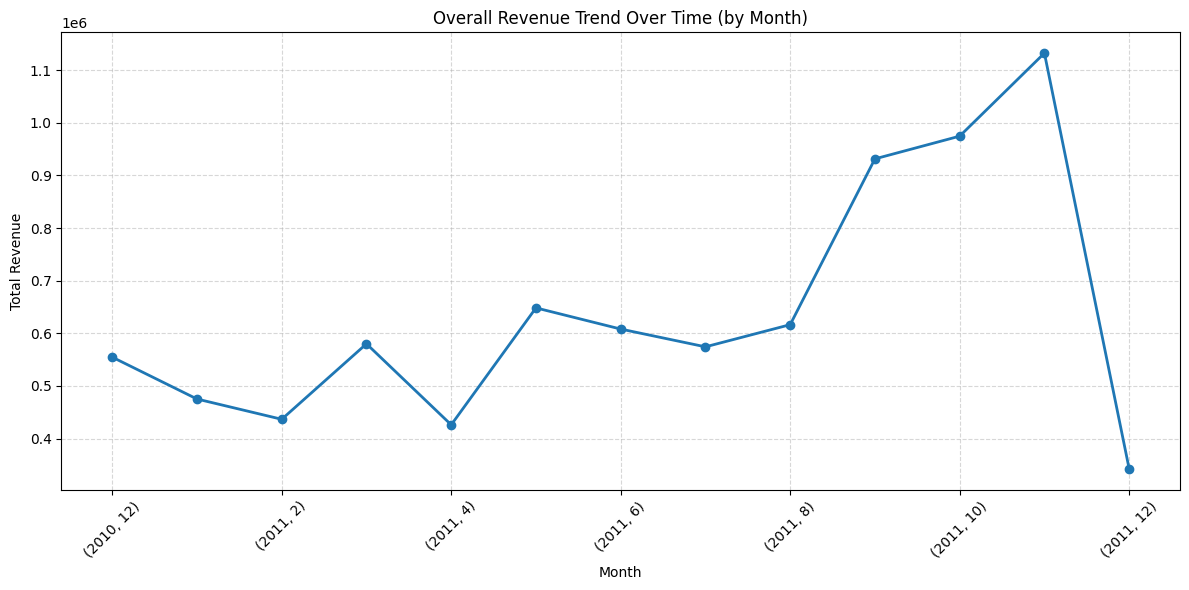

In [ ]:
# Group by 'Year' and 'Month' and calculate the total revenue generated for each month
revenue_by_month = df_cleaned.groupby(['Year', 'Month'])['Revenue'].sum()

# Create a simple line plot to visualize the revenue trend over time
plt.figure(figsize=(12, 6))
revenue_by_month.plot(marker='o', linestyle='-', linewidth=2)
plt.title('Overall Revenue Trend Over Time (by Month)')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('revenue_trend.png')

# Show the plot
plt.show()
print(revenue_by_month)

In [ ]:
# # Group by 'Month' and calculate the total revenue generated for each month
# monthly_revenue = df_cleaned.groupby('Month')['Revenue'].sum()

# # Define month names for labeling the x-axis
# month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# # Create a line plot to visualize the monthly revenue trend
# plt.figure(figsize=(12, 6))
# plt.plot(month_names, monthly_revenue.values.tolist(), marker='o', linestyle='-', linewidth=2, color='skyblue')
# plt.title('Monthly Revenue Trend')
# plt.xlabel('Month')
# plt.ylabel('Total Revenue')
# plt.grid(True, linestyle='--', alpha=0.5)
# plt.tight_layout()

# # Show the plot
# plt.show()

Year  Month
2010  12        554604.020
2011  1         475074.380
      2         436546.150
      3         579964.610
      4         426047.851
      5         648251.080
      6         608013.160
      7         574238.481
      8         616368.000
      9         931440.372
      10        974603.590
      11       1132407.740
      12        342506.380
Name: Revenue, dtype: float64


In [ ]:
# Create an 'Hour' column from 'InvoiceDate'
df_cleaned['Hour'] = df_cleaned['InvoiceDate'].dt.hour

# Count the number of orders for each hour
hourly_order_counts = df_cleaned['Hour'].value_counts()

# Find the peak hour(s) when most orders are placed
peak_hours = hourly_order_counts[hourly_order_counts == hourly_order_counts.max()]

# Print the peak hour(s) and the corresponding number of orders
print("Peak Hour(s) for Order Placement:")
print(peak_hours)

Peak Hour(s) for Order Placement:
12    73338
Name: Hour, dtype: int64


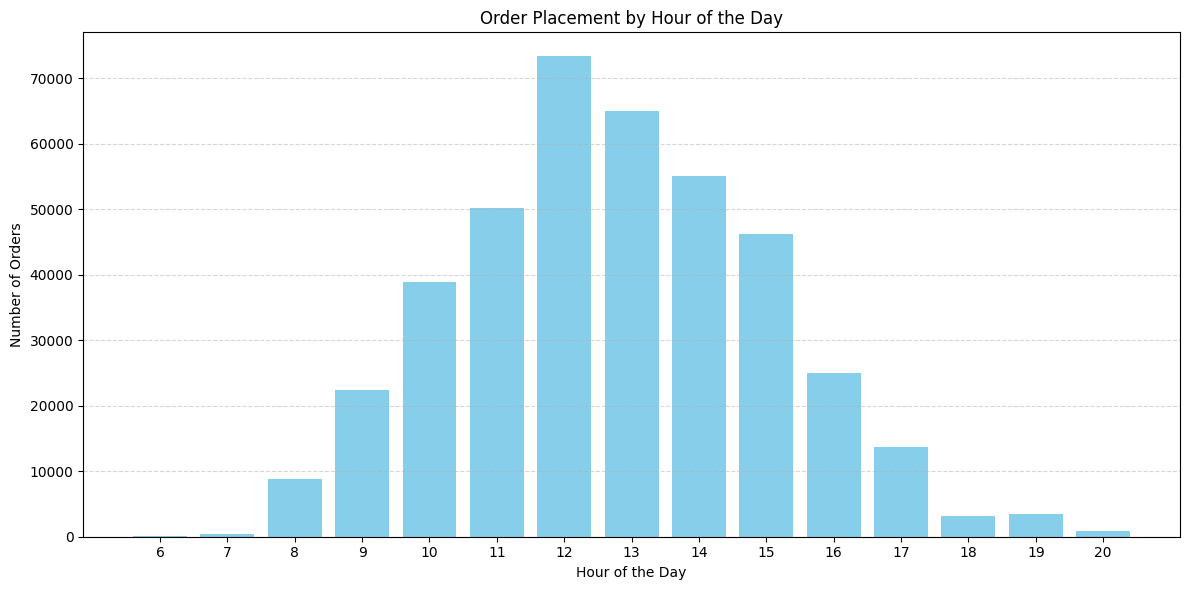

12    73338
13    65057
14    55066
11    50241
15    46217
10    38949
16    24993
9     22463
17    13733
8      8791
19     3510
18     3136
20      871
7       383
6        41
Name: Hour, dtype: int64


In [ ]:
# Create a bar plot to visualize the peak hours
plt.figure(figsize=(12, 6))
plt.bar(hourly_order_counts.index, hourly_order_counts.values, color='skyblue')
plt.title('Order Placement by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(hourly_order_counts.index)
plt.tight_layout()
plt.savefig('revenue_trend.png')

# Show the plot
plt.show()
print(hourly_order_counts)

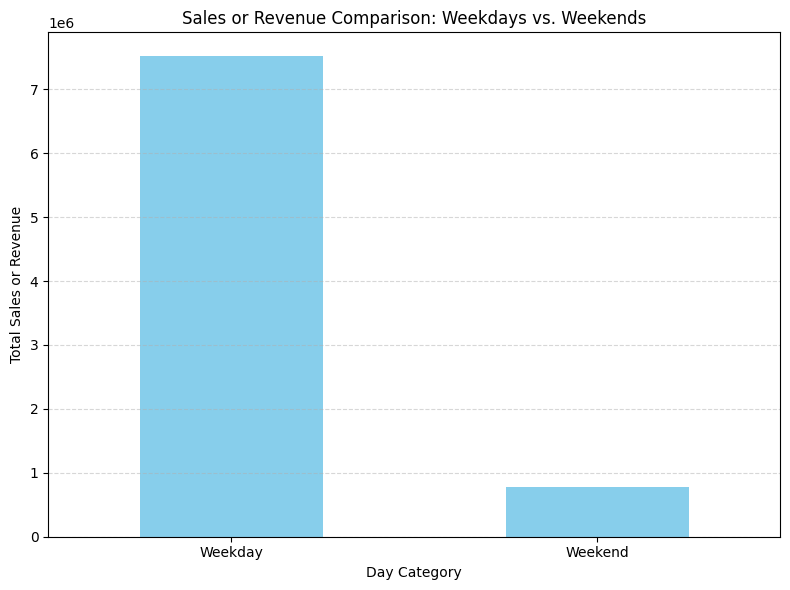

DayCategory
Weekday    7515646.963
Weekend     784418.851
Name: Revenue, dtype: float64


In [ ]:
# Create a new column 'DayOfWeekName' to represent the day of the week as a name (e.g., 'Monday', 'Tuesday', etc.)
df_cleaned['DayOfWeekName'] = df_cleaned['InvoiceDate'].dt.strftime('%A')

# Define a function to categorize days into 'Weekday' or 'Weekend'
def categorize_day(day_name):
    if day_name in ['Saturday', 'Sunday']:
        return 'Weekend'
    else:
        return 'Weekday'

# Apply the categorization function to create a new column 'DayCategory'
df_cleaned['DayCategory'] = df_cleaned['DayOfWeekName'].apply(categorize_day)

# Group by 'DayCategory' and calculate the total revenue for each category
revenue_by_day_category = df_cleaned.groupby('DayCategory')['Revenue'].sum()

# Create a bar plot to visualize the differences in sales or revenue between weekdays and weekends
plt.figure(figsize=(8, 6))
revenue_by_day_category.plot(kind='bar', color='skyblue')
plt.title('Sales or Revenue Comparison: Weekdays vs. Weekends')
plt.xlabel('Day Category')
plt.ylabel('Total Sales or Revenue')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('revenue_trend.png')

# Show the plot
plt.show()

print(revenue_by_day_category)

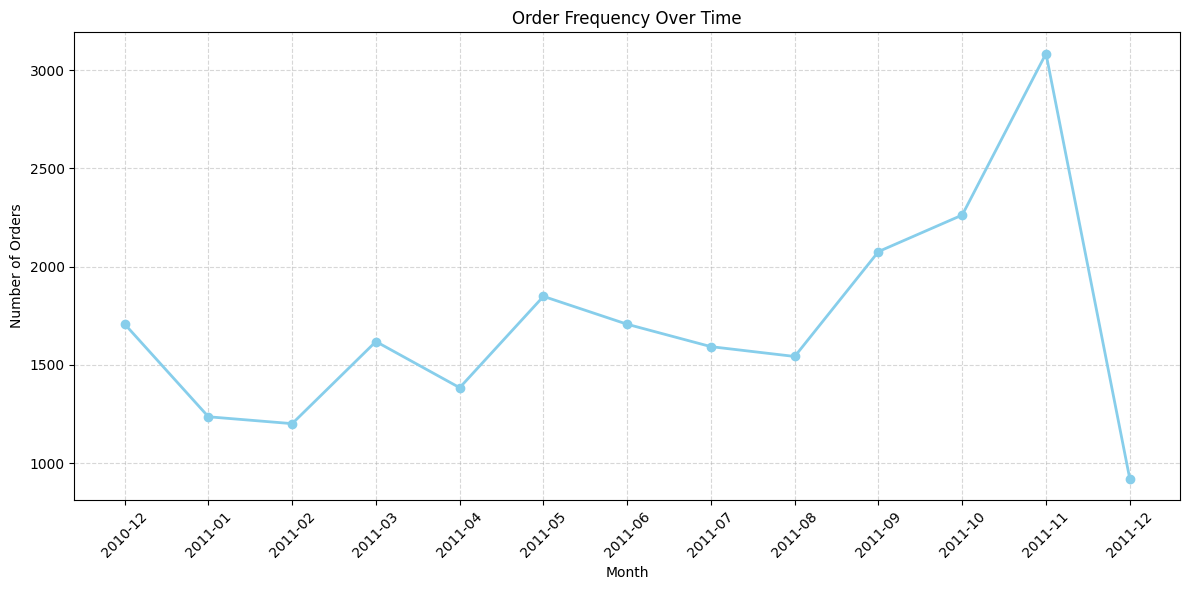

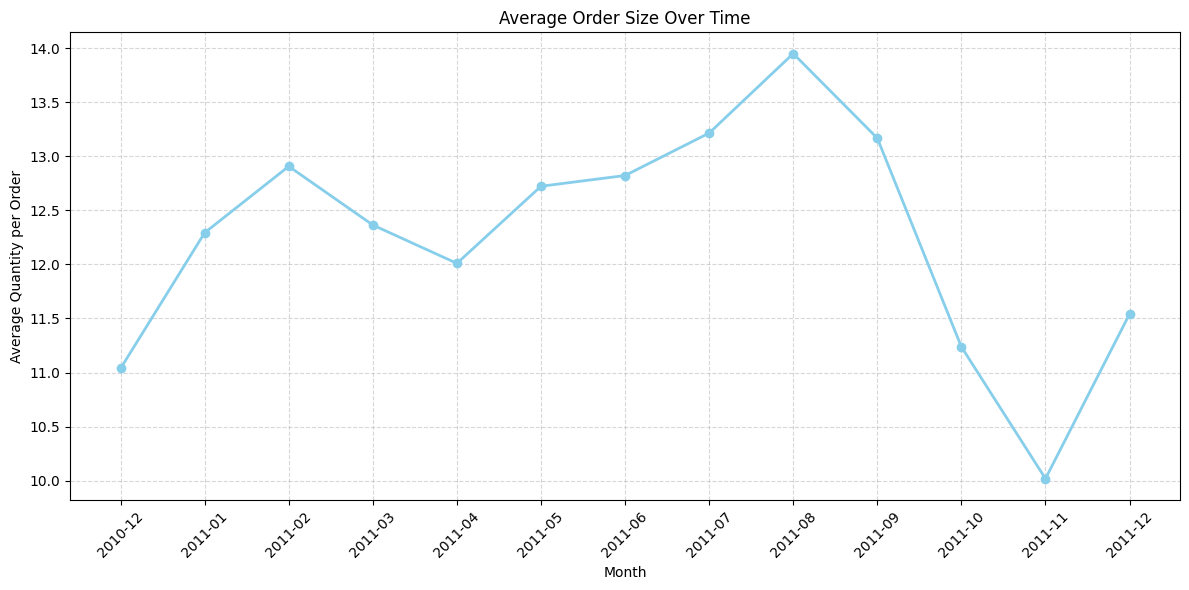

Order Frequency: YearMonth
2011-11    3085
2011-10    2263
2011-09    2077
2011-05    1849
2010-12    1708
2011-06    1707
2011-03    1619
2011-07    1593
2011-08    1543
2011-04    1384
2011-01    1236
2011-02    1201
2011-12     921
Freq: M, Name: InvoiceNo, dtype: int64
average_order_size YearMonth
2011-08    13.949776
2011-07    13.214764
2011-09    13.167418
2011-02    12.907229
2011-06    12.822316
2011-05    12.722895
2011-03    12.364162
2011-01    12.293122
2011-04    12.009916
2011-12    11.541589
2011-10    11.237631
2010-12    11.038366
2011-11    10.018877
Freq: M, Name: Quantity, dtype: float64


In [ ]:
# Extract year and month from 'InvoiceDate'
df_cleaned['YearMonth'] = df_cleaned['InvoiceDate'].dt.to_period('M')

# Group by 'YearMonth' and count the number of unique invoices per month (order frequency)
order_frequency = df_cleaned.groupby('YearMonth')['InvoiceNo'].nunique()

# Create a line plot to visualize order frequency over time
plt.figure(figsize=(12, 6))
plt.plot(order_frequency.index.astype(str), order_frequency.values, marker='o', linestyle='-', linewidth=2, color='skyblue')
plt.title('Order Frequency Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Group by 'YearMonth' and calculate the average quantity per order for each month (average order size)
average_order_size = df_cleaned.groupby('YearMonth')['Quantity'].mean()

# Create a line plot to visualize average order size over time
plt.figure(figsize=(12, 6))
plt.plot(average_order_size.index.astype(str), average_order_size.values, marker='o', linestyle='-', linewidth=2, color='skyblue')
plt.title('Average Order Size Over Time')
plt.xlabel('Month')
plt.ylabel('Average Quantity per Order')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot

plt.show()
print ("Order Frequency:",order_frequency.sort_values(ascending=False))
print ("average_order_size",average_order_size.sort_values(ascending=False))

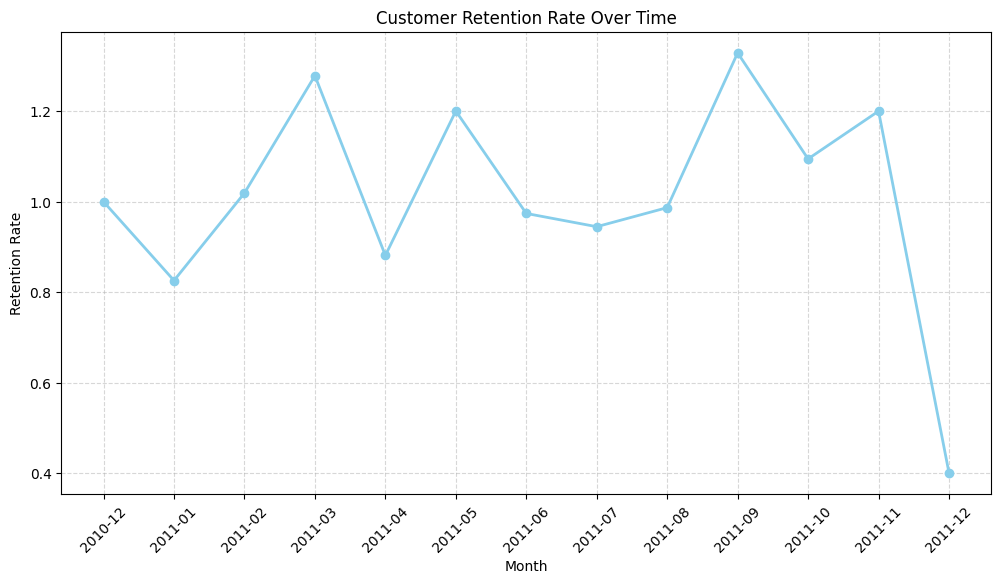

      Month  Retention Rate
9   2011-09        1.328571
3   2011-03        1.278195
5   2011-05        1.200222
11  2011-11        1.200000
10  2011-10        1.094470
2   2011-02        1.019157
0   2010-12        1.000000
8   2011-08        0.986908
6   2011-06        0.974050
7   2011-07        0.944814
4   2011-04        0.881373
1   2011-01        0.825949
12  2011-12        0.401170


In [ ]:
# Extract year and month from 'InvoiceDate'
df_cleaned['YearMonth'] = df_cleaned['InvoiceDate'].dt.to_period('M')

# Group by 'YearMonth' and count the number of unique customers for each month
unique_customers_by_month = df_cleaned.groupby('YearMonth')['CustomerID'].nunique()

# Initialize a dictionary to store the retention rates
retention_rates = {'Month': [], 'Retention Rate': []}

# Calculate customer retention rates for each month
for i in range(len(unique_customers_by_month)):
    current_month = unique_customers_by_month.index[i]
    retained_customers = unique_customers_by_month[i]

    # Calculate retention rate
    if i == 0:
        retention_rate = 1.0  # The first month has 100% retention as there's no previous month to compare to.
    else:
        previous_month = unique_customers_by_month.index[i - 1]
        previous_customers = unique_customers_by_month[i - 1]
        retention_rate = retained_customers / previous_customers

    # Append data to the dictionary
    retention_rates['Month'].append(current_month)
    retention_rates['Retention Rate'].append(retention_rate)

# Convert the dictionary to a DataFrame
retention_df = pd.DataFrame(retention_rates)

# Create a line plot to visualize customer retention rates over time
plt.figure(figsize=(12, 6))
plt.plot(retention_df['Month'].astype(str), retention_df['Retention Rate'], marker='o', linestyle='-', linewidth=2, color='skyblue')
plt.title('Customer Retention Rate Over Time')
plt.xlabel('Month')
plt.ylabel('Retention Rate')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)

# Show the plot
plt.show()
print(retention_df.sort_values(by="Retention Rate",ascending=False))

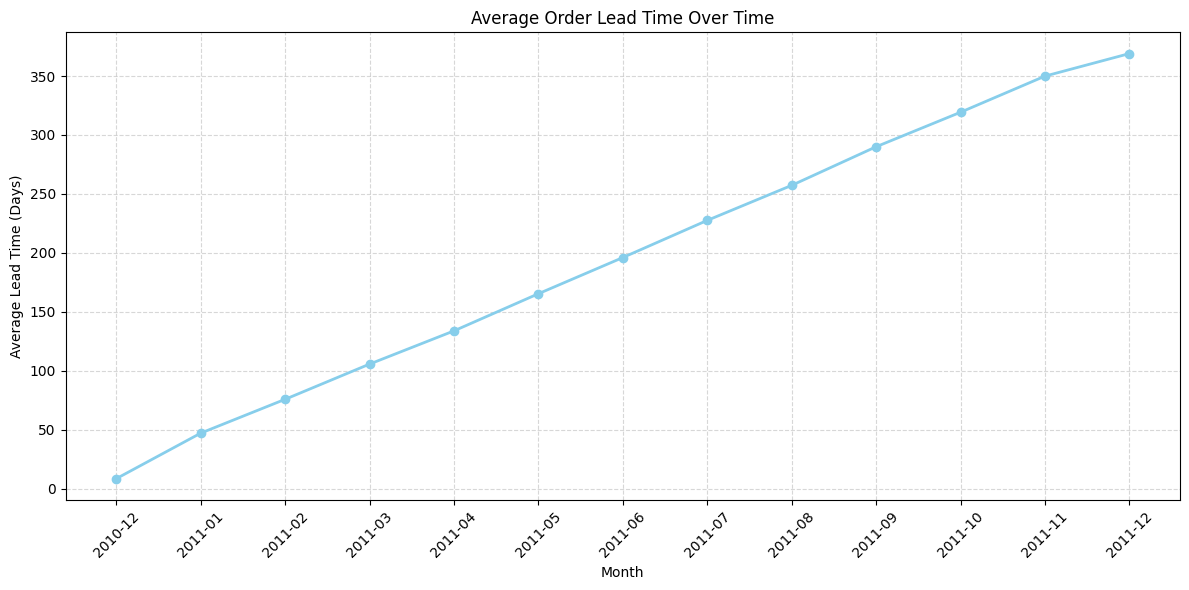

average_lead_time_by_month YearMonth
2011-12    369.021233
2011-11    349.897353
2011-10    319.263612
2011-09    290.001666
2011-08    257.271804
2011-07    227.565709
2011-06    196.062725
2011-05    165.386079
2011-04    133.882652
2011-03    105.711431
2011-02     75.856890
2011-01     47.155735
2010-12      8.562744
Freq: M, Name: LeadTime, dtype: float64


In [ ]:
# Calculate the lead time for each order (time from order creation to delivery)
df_cleaned['LeadTime'] = (df_cleaned['InvoiceDate'] - df_cleaned['InvoiceDate'].min()).dt.days

# Group by 'YearMonth' and calculate the average lead time for each month
average_lead_time_by_month = df_cleaned.groupby('YearMonth')['LeadTime'].mean()

# Create a line plot to visualize the average lead time over time
plt.figure(figsize=(12, 6))
plt.plot(average_lead_time_by_month.index.astype(str), average_lead_time_by_month.values, marker='o', linestyle='-', linewidth=2, color='skyblue')
plt.title('Average Order Lead Time Over Time')
plt.xlabel('Month')
plt.ylabel('Average Lead Time (Days)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
print("average_lead_time_by_month",average_lead_time_by_month.sort_values(ascending=False))

In [ ]:
# Define the holiday or event periods you want to analyze
holiday_periods = [
    {'name': 'Christmas', 'start_date': '2010-12-01', 'end_date': '2010-12-31'},
    {'name': 'New Year', 'start_date': '2010-12-31', 'end_date': '2011-01-01'},
    # Add more holiday periods or events as needed
]

# Create an empty list to store DataFrames
holiday_analysis_list = []

# Calculate sales and revenue metrics for each holiday or event
for period in holiday_periods:
    start_date = pd.to_datetime(period['start_date'])
    end_date = pd.to_datetime(period['end_date'])

    # Filter data for the specific holiday or event period
    holiday_data = df_cleaned[(df_cleaned['InvoiceDate'] >= start_date) & (df_cleaned['InvoiceDate'] <= end_date)]

    # Calculate total sales and revenue for the holiday period
    total_sales = holiday_data['Quantity'].sum()
    total_revenue = (holiday_data['Quantity'] * holiday_data['UnitPrice']).sum()

    # Create a DataFrame for the holiday period
    holiday_df = pd.DataFrame({'Holiday': [period['name']], 'Total Sales': [total_sales], 'Total Revenue': [total_revenue]})

    # Append the DataFrame to the list
    holiday_analysis_list.append(holiday_df)

# Concatenate all DataFrames in the list into one DataFrame
holiday_analysis = pd.concat(holiday_analysis_list, ignore_index=True)

# Display the results
print(holiday_analysis)

     Holiday  Total Sales  Total Revenue
0  Christmas       296347      554604.02
1   New Year            0           0.00


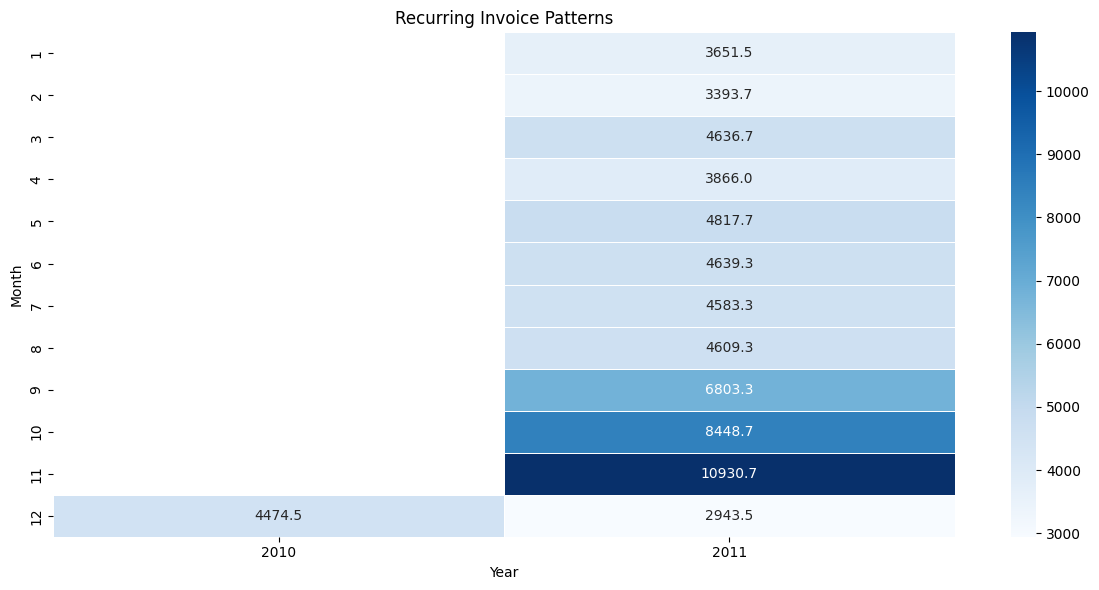

Year     2010          2011
Month                      
1         NaN   3651.500000
2         NaN   3393.666667
3         NaN   4636.666667
4         NaN   3866.000000
5         NaN   4817.666667
6         NaN   4639.333333
7         NaN   4583.333333
8         NaN   4609.333333
9         NaN   6803.333333
10        NaN   8448.666667
11        NaN  10930.666667
12     4474.5   2943.500000


In [ ]:
# Group by 'Year', 'Month', and 'DayOfWeek' and count the number of invoices
invoice_counts = df_cleaned.groupby(['Year', 'Month', 'DayOfWeek'])['InvoiceNo'].count().reset_index()

# Pivot the data to create a heatmap
pivot_table = invoice_counts.pivot_table(values='InvoiceNo', index='Month', columns='Year', aggfunc='mean')

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt=".1f", linewidths=0.5)
plt.title('Recurring Invoice Patterns')
plt.xlabel('Year')
plt.ylabel('Month')
plt.tight_layout()

# Show the heatmap
plt.show()

print(pivot_table)

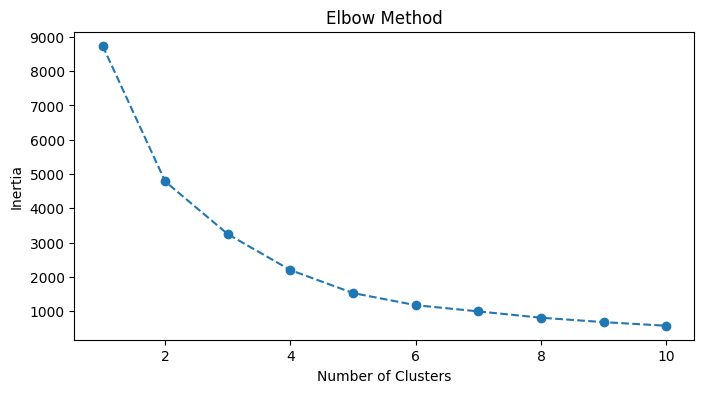

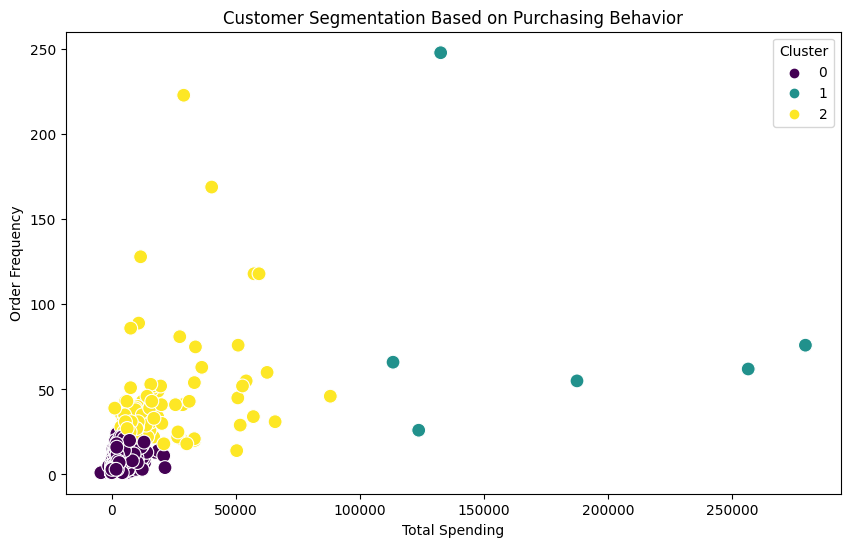

      CustomerID  TotalSpending  OrderFrequency  Cluster
0        12346.0           0.00               2        0
1        12347.0        4310.00               7        0
2        12348.0        1797.24               4        0
3        12349.0        1757.55               1        0
4        12350.0         334.40               1        0
...          ...            ...             ...      ...
4366     18280.0         180.60               1        0
4367     18281.0          80.82               1        0
4368     18282.0         176.60               3        0
4369     18283.0        2094.88              16        0
4370     18287.0        1837.28               3        0

[4371 rows x 4 columns]


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Calculate total spending per customer
customer_total_spending = df_cleaned.groupby('CustomerID')['Revenue'].sum().reset_index()

# Calculate order frequency (number of unique invoices) per customer
customer_order_frequency = df_cleaned.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Merge the two metrics into a single DataFrame
customer_metrics = pd.merge(customer_total_spending, customer_order_frequency, on='CustomerID', how='inner')
customer_metrics.columns = ['CustomerID', 'TotalSpending', 'OrderFrequency']

# Standardize the data
scaler = StandardScaler()
customer_metrics_scaled = scaler.fit_transform(customer_metrics[['TotalSpending', 'OrderFrequency']])

# Use PCA to reduce dimensionality (optional)
pca = PCA(n_components=2)
customer_metrics_pca = pca.fit_transform(customer_metrics_scaled)

# Determine the number of clusters (e.g., using the Elbow method)
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10).fit(customer_metrics_scaled)  # Set n_init explicitly
    inertia.append(kmeans.inertia_)
# Plot the Elbow method to choose the number of clusters
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Based on the Elbow method, choose an appropriate number of clusters (e.g., 3)

# Perform K-means clustering
n_clusters = 3  # You can choose an appropriate number based on the Elbow method
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10).fit(customer_metrics_scaled)  # Set n_init explicitly

# Add cluster labels to the original DataFrame
customer_metrics['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_metrics, x='TotalSpending', y='OrderFrequency', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segmentation Based on Purchasing Behavior')
plt.xlabel('Total Spending')
plt.ylabel('Order Frequency')
plt.legend(title='Cluster')
plt.show()
print(customer_metrics)


In [ ]:
customer_metrics.head()

,CustomerID,TotalSpending,OrderFrequency,Cluster
0,12346.0,0.00,2,0
1,12347.0,4310.00,7,0
2,12348.0,1797.24,4,0
3,12349.0,1757.55,1,0
4,12350.0,334.40,1,0


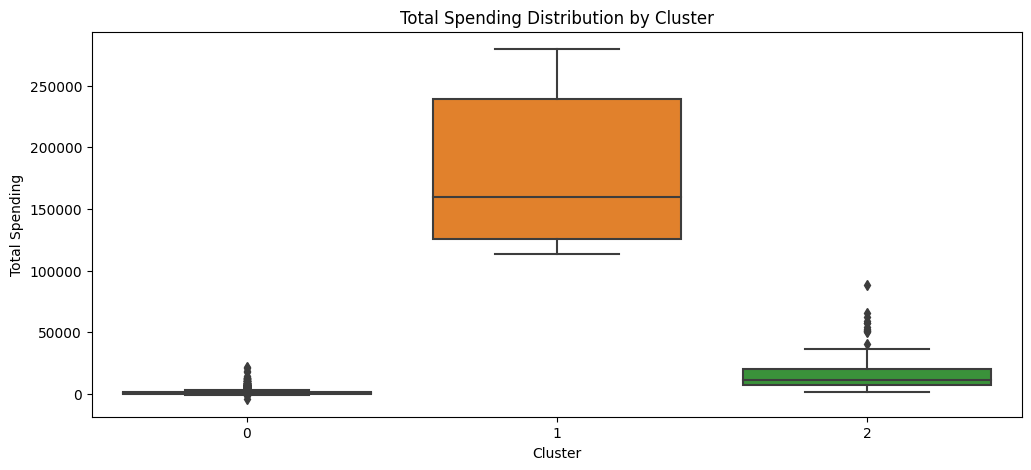

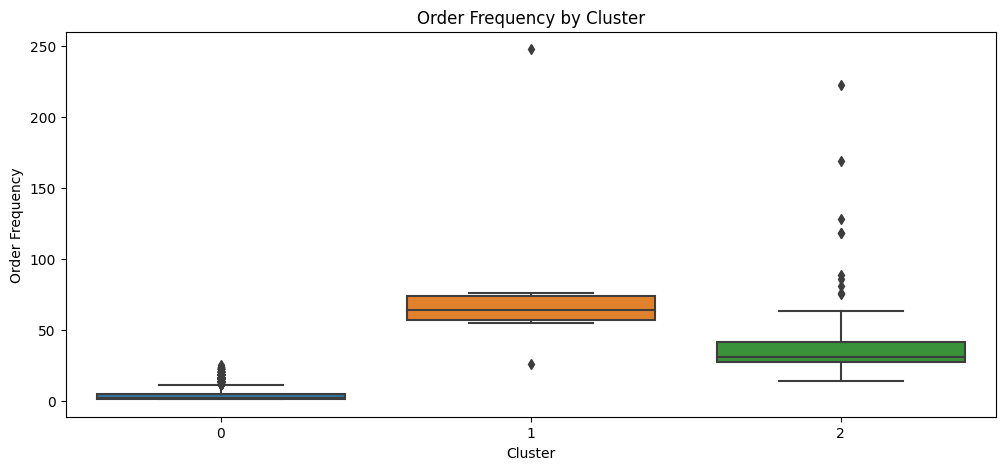

In [ ]:
# Analyze total spending distribution within each cluster
plt.figure(figsize=(12, 5))
sns.boxplot(data=customer_metrics, x='Cluster', y='TotalSpending')
plt.title('Total Spending Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Spending')
plt.show()

# Analyze order frequency within each cluster
plt.figure(figsize=(12, 5))
sns.boxplot(data=customer_metrics, x='Cluster', y='OrderFrequency')
plt.title('Order Frequency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Order Frequency')
plt.show()

In [ ]:
customer_metrics.describe()

,CustomerID,TotalSpending,OrderFrequency,Cluster
count,4371.000000,4371.000000,4371.000000,4371.000000
mean,15300.145276,1898.894032,5.075726,0.054450
std,1722.310262,8220.235339,9.332529,0.323398
min,12346.000000,-4287.630000,1.000000,0.000000
25%,13813.500000,293.785000,1.000000,0.000000
50%,15301.000000,648.410000,3.000000,0.000000
75%,16778.500000,1611.860000,5.000000,0.000000
max,18287.000000,279489.020000,248.000000,2.000000


In [ ]:
df_cleaned.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Revenue', 'Year', 'Month', 'Day',
       'DayOfWeek', 'YearMonth', 'Hour', 'DayOfWeekName', 'DayCategory',
       'LeadTime'],
      dtype='object')

       TotalSpending  OrderFrequency
count       6.000000        6.000000
mean   182181.981667       88.833333
std     71585.164123       79.790768
min    113384.140000       26.000000
25%    125937.242500       56.750000
50%    160027.395000       64.000000
75%    239199.410000       73.500000
max    279489.020000      248.000000

Top Customers in Cluster 1 by Total Spending:
      CustomerID  TotalSpending  OrderFrequency  Cluster
1702     14646.0      279489.02              76        1
4232     18102.0      256438.49              62        1
3757     17450.0      187482.17              55        1
1894     14911.0      132572.62             248        1
55       12415.0      123725.45              26        1
1344     14156.0      113384.14              66        1

Top Customers in Cluster 1 by Order Frequency:
      CustomerID  TotalSpending  OrderFrequency  Cluster
1894     14911.0      132572.62             248        1
1702     14646.0      279489.02              76        1
13

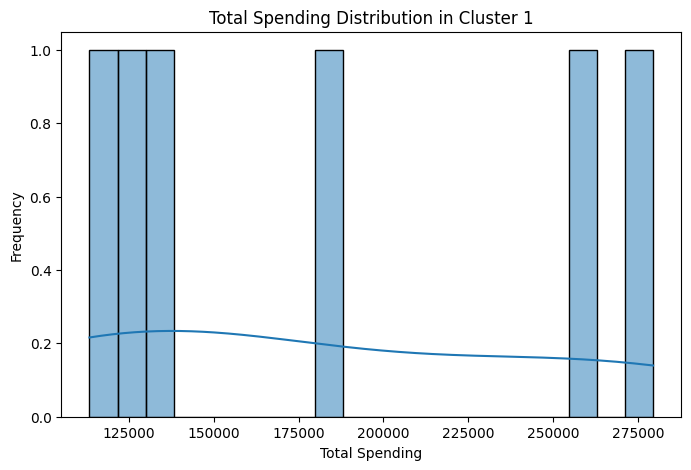

In [ ]:
# Filter the DataFrame to select only data for Cluster 1
cluster_1_data = customer_metrics[customer_metrics['Cluster'] == 1]

# Calculate summary statistics for Cluster 1
cluster_1_summary = cluster_1_data[['TotalSpending', 'OrderFrequency']].describe()
print(cluster_1_summary)

# Identify top customers within Cluster 1 by total spending
top_customers_cluster_1 = cluster_1_data.nlargest(10, 'TotalSpending')

# Identify top customers within Cluster 1 by order frequency
frequent_customers_cluster_1 = cluster_1_data.nlargest(10, 'OrderFrequency')

print("\nTop Customers in Cluster 1 by Total Spending:")
print(top_customers_cluster_1)

print("\nTop Customers in Cluster 1 by Order Frequency:")
print(frequent_customers_cluster_1)

# Create a histogram of total spending in Cluster 1
plt.figure(figsize=(8, 5))
sns.histplot(data=cluster_1_data, x='TotalSpending', bins=20, kde=True)
plt.title('Total Spending Distribution in Cluster 1')
plt.xlabel('Total Spending')
plt.ylabel('Frequency')
plt.show()

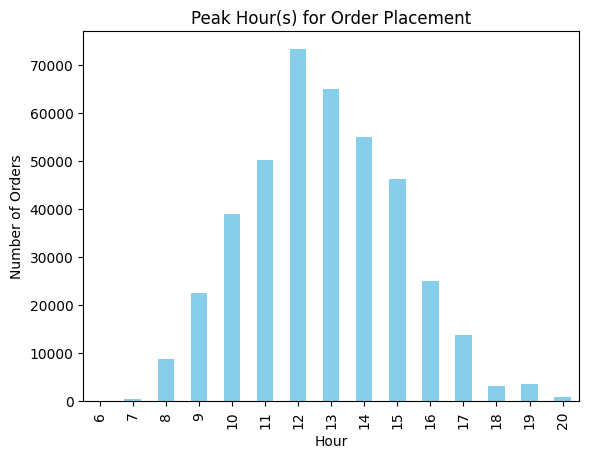

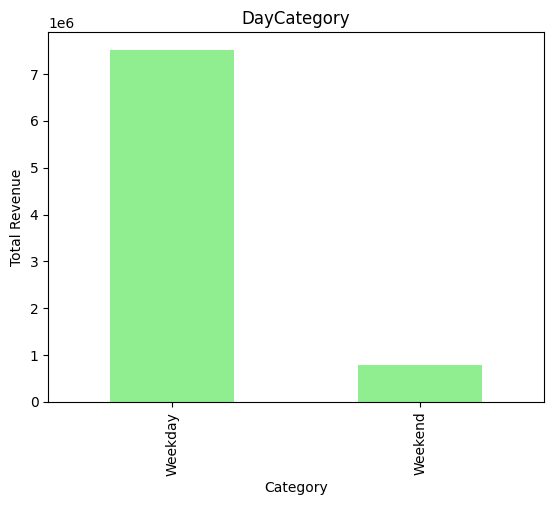

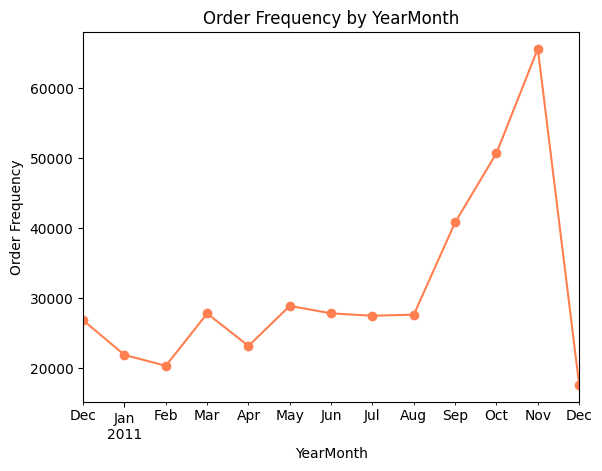

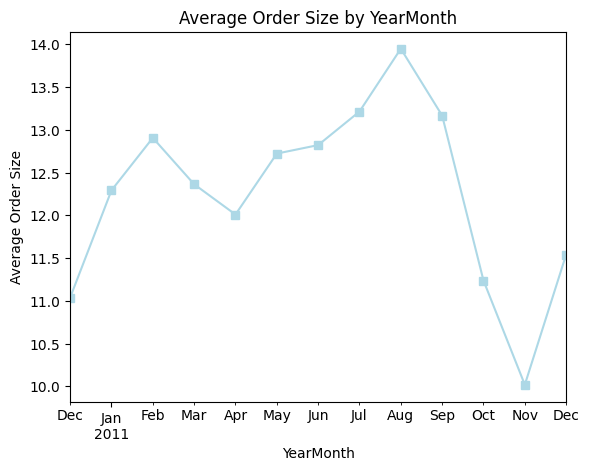

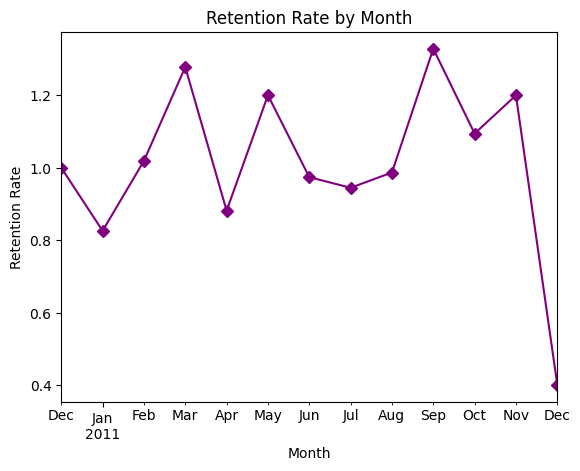

In [ ]:
# Plot 1: Bar Chart for Peak Hour(s) for Order Placement
hourly_orders = df_cleaned.groupby('Hour')['InvoiceNo'].count()
hourly_orders.plot(kind='bar', color='skyblue')
plt.title('Peak Hour(s) for Order Placement')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.savefig('peak_hour_orders.png')
plt.show()

# Plot 2: Bar Chart for DayCategory
day_category_revenue = df_cleaned.groupby('DayCategory')['Revenue'].sum()
day_category_revenue.plot(kind='bar', color='lightgreen')
plt.title('DayCategory')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.savefig('day_category_revenue.png')
plt.show()

# Plot 3: Line Chart for Order Frequency by YearMonth
monthly_order_counts = df_cleaned.groupby('YearMonth')['InvoiceNo'].count()
monthly_order_counts.plot(kind='line', marker='o', color='coral')
plt.title('Order Frequency by YearMonth')
plt.xlabel('YearMonth')
plt.ylabel('Order Frequency')
plt.savefig('order_frequency_yearmonth.png')
plt.show()

# Plot 4: Line Chart for Average Order Size by YearMonth
avg_order_size = df_cleaned.groupby('YearMonth')['Quantity'].mean()
avg_order_size.plot(kind='line', marker='s', color='lightblue')
plt.title('Average Order Size by YearMonth')
plt.xlabel('YearMonth')
plt.ylabel('Average Order Size')
plt.savefig('average_order_size_yearmonth.png')
plt.show()

# Plot 5: Retention Rate by Month Line Chart
monthly_retention_rate = retention_df.groupby('Month')['Retention Rate'].max()
monthly_retention_rate.plot(kind='line', marker='D', color='purple')
plt.title('Retention Rate by Month')
plt.xlabel('Month')
plt.ylabel('Retention Rate')
plt.savefig('retention_rate_yearmonth.png')
plt.show()

In [ ]:
retention_df.columns

Index(['Month', 'Retention Rate'], dtype='object')

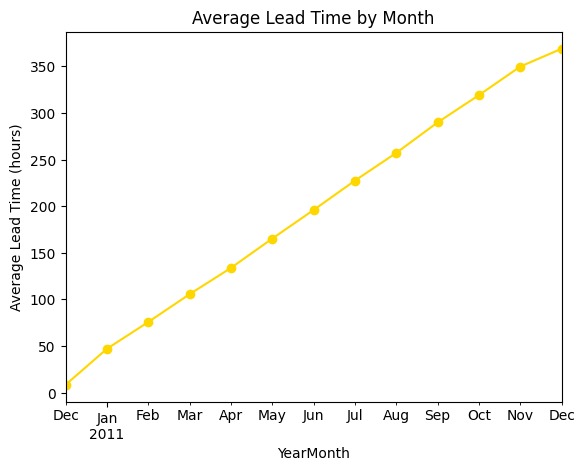

No data available for Holiday-Related Sales and Revenue.


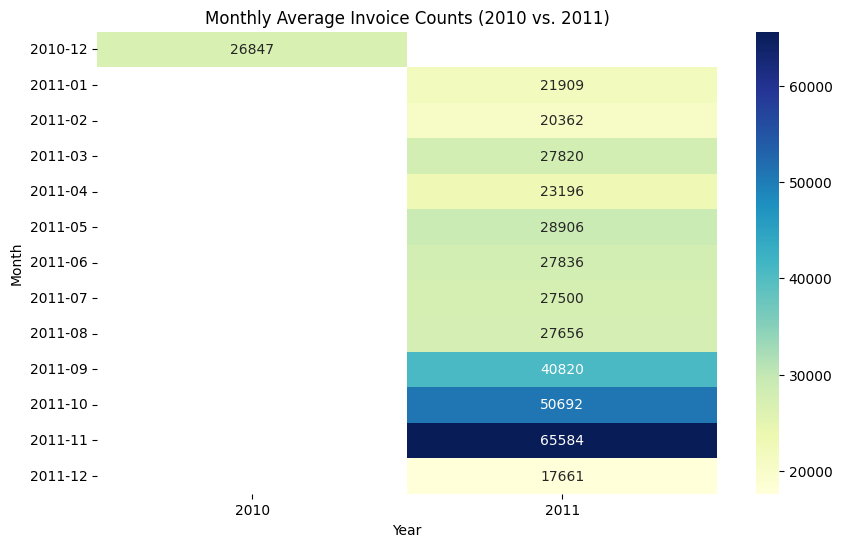

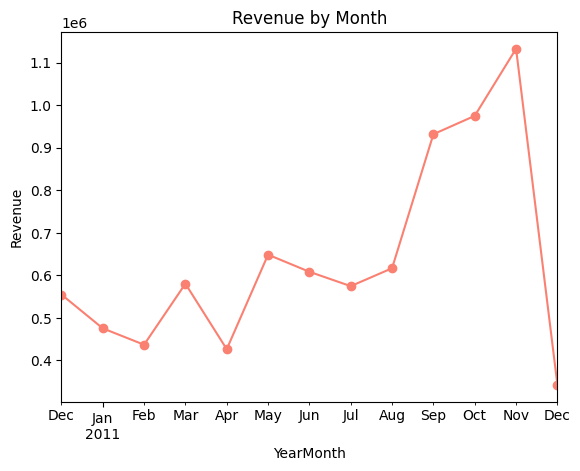

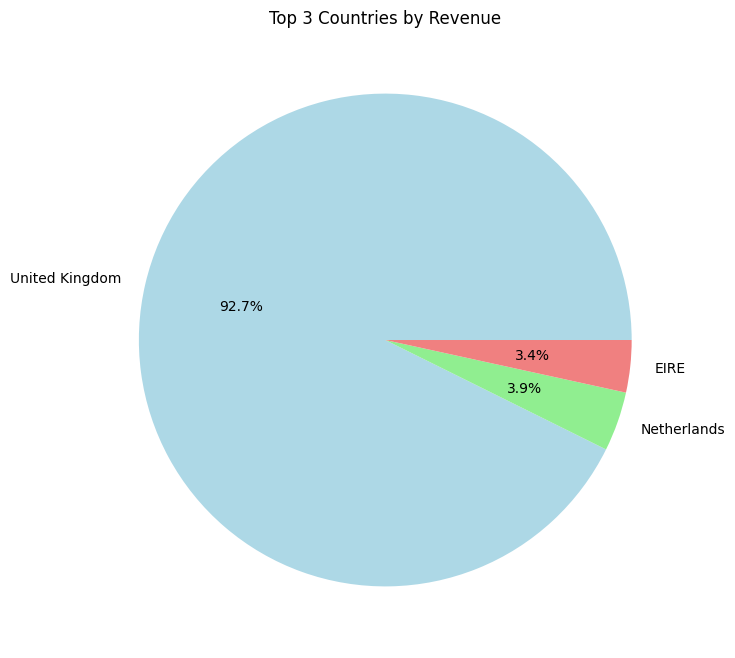

In [ ]:
# Ensure df_cleaned has data and the specified columns
if df_cleaned.empty:
    print("DataFrame df_cleaned is empty. Please check your data.")
else:
    # Plot 6: Line Chart for Average Lead Time by Month
    monthly_avg_lead_time = df_cleaned.groupby('YearMonth')['LeadTime'].mean()
    if not monthly_avg_lead_time.empty:
        monthly_avg_lead_time.plot(kind='line', marker='o', color='gold')
        plt.title('Average Lead Time by Month')
        plt.xlabel('YearMonth')
        plt.ylabel('Average Lead Time (hours)')
        plt.savefig('average_lead_time_yearmonth.png')
        plt.show()
    else:
        print("No data available for Average Lead Time by Month.")

    # Plot 7: Holiday-Related Sales and Revenue Bar Chart
    holiday_sales_revenue = df_cleaned[df_cleaned['YearMonth'].isin(['2010-12', '2011-12'])].groupby('YearMonth')[['Quantity', 'Revenue']].sum()
    if not holiday_sales_revenue.empty:
        holiday_sales_revenue.plot(kind='bar', color=['lightblue', 'lightgreen'])
        plt.title('Holiday-Related Sales and Revenue')
        plt.xlabel('YearMonth')
        plt.ylabel('Quantity / Revenue')
        plt.savefig('holiday_sales_revenue.png')
        plt.show()
    else:
        print("No data available for Holiday-Related Sales and Revenue.")

# Plot 8: Heatmap for Monthly Average Invoice Counts (2010 vs. 2011)
    monthly_avg_invoice_counts = df_cleaned.pivot_table(index='YearMonth', columns='Year', values='InvoiceNo', aggfunc='count')
    if not monthly_avg_invoice_counts.empty:
        plt.figure(figsize=(10, 6))
        sns.heatmap(monthly_avg_invoice_counts, annot=True, cmap='YlGnBu', fmt='g')
        plt.title('Monthly Average Invoice Counts (2010 vs. 2011)')
        plt.xlabel('Year')
        plt.ylabel('Month')
        plt.savefig('monthly_avg_invoice_counts_heatmap.png')
        plt.show()
    else:
        print("No data available for Monthly Average Invoice Counts (2010 vs. 2011).")

    # Plot 9: Line Chart for Revenue by Month
    monthly_revenue = df_cleaned.groupby('YearMonth')['Revenue'].sum()
    if not monthly_revenue.empty:
        monthly_revenue.plot(kind='line', marker='o', color='salmon')
        plt.title('Revenue by Month')
        plt.xlabel('YearMonth')
        plt.ylabel('Revenue')
        plt.savefig('revenue_by_month.png')
        plt.show()
    else:
        print("No data available for Revenue by Month.")

    # Plot 10: Pie Chart for Top 3 Countries by Revenue
    top_countries_revenue = df_cleaned.groupby('Country')['Revenue'].sum().nlargest(3)
    if not top_countries_revenue.empty:
        plt.figure(figsize=(8, 8))
        plt.pie(top_countries_revenue, labels=top_countries_revenue.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
        plt.title('Top 3 Countries by Revenue')
        plt.savefig('top_countries_revenue_pie.png')
        plt.show()
    else:
        print("No data available for Top 3 Countries by Revenue.")

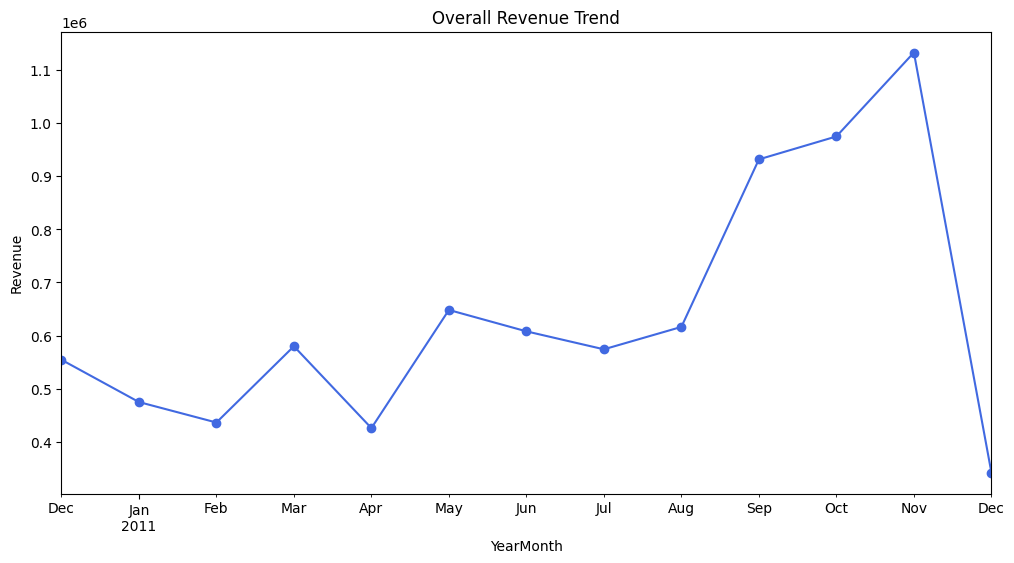

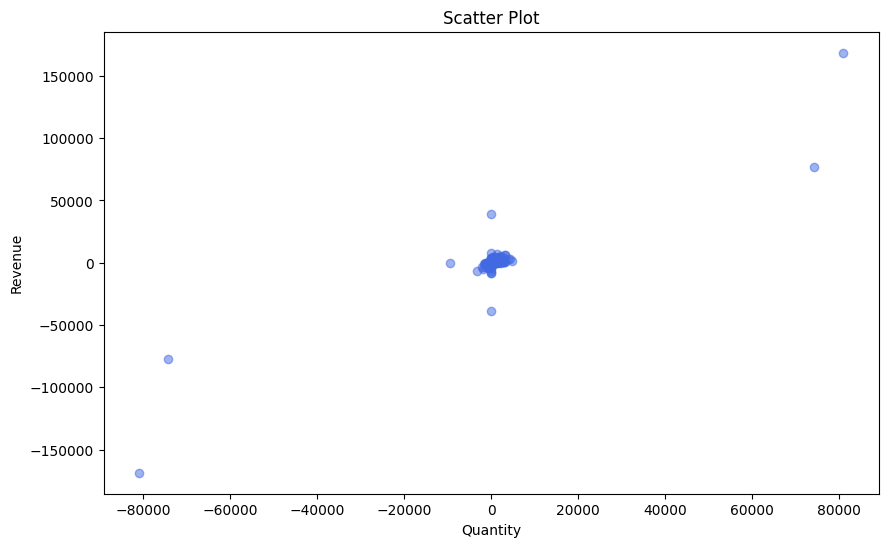

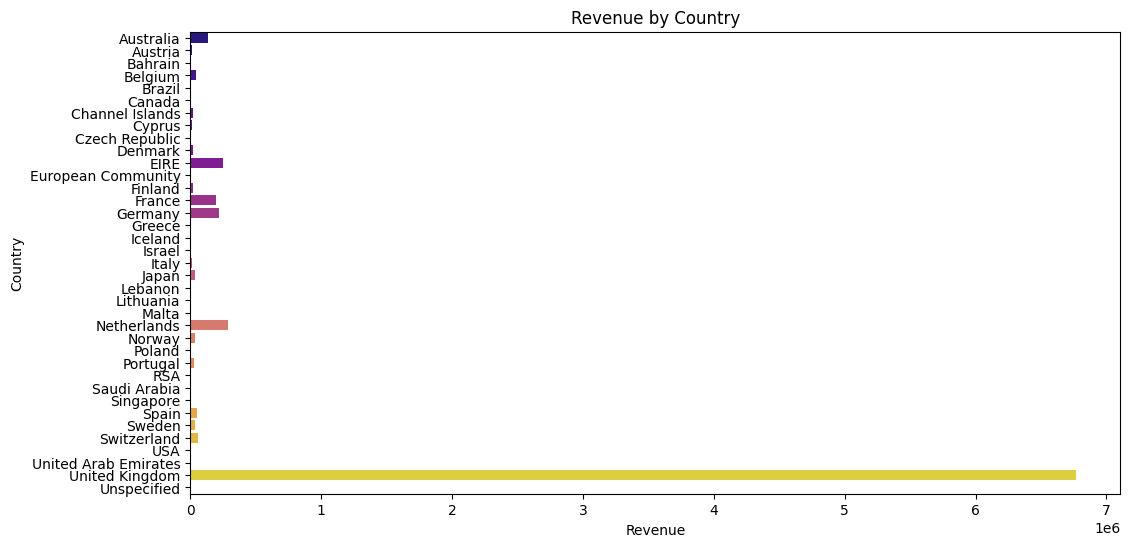

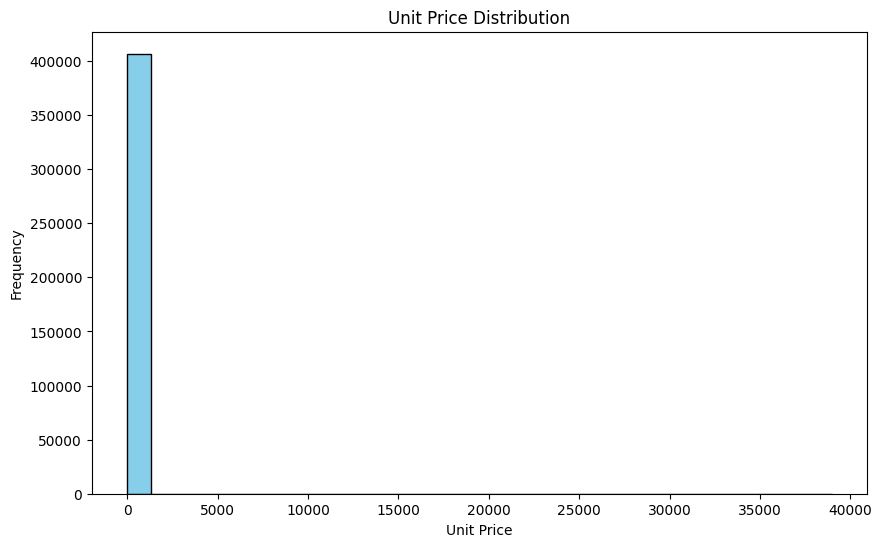

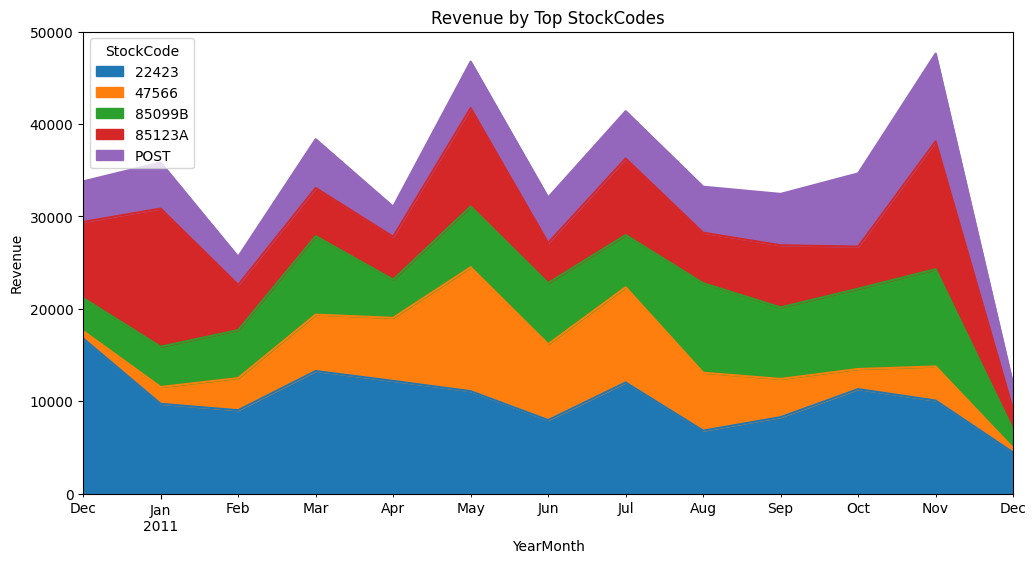

In [ ]:
# Ensure df_cleaned has data and the specified columns
if not df_cleaned.empty:
    # Plot 11: Time Series Plot for Overall Revenue Trend
    plt.figure(figsize=(12, 6))
    monthly_revenue = df_cleaned.groupby('YearMonth')['Revenue'].sum()
    if not monthly_revenue.empty:
        monthly_revenue.plot(kind='line', marker='o', color='royalblue')
        plt.title('Overall Revenue Trend')
        plt.xlabel('YearMonth')
        plt.ylabel('Revenue')
        plt.savefig('overall_revenue_trend.png')
        plt.show()
    else:
        print("No data available for Overall Revenue Trend.")

    # Plot 12: Scatter Plot without Clustering
    x_column = 'Quantity'  # Replace with the desired column name
    y_column = 'Revenue'   # Replace with the desired column name

    if x_column in df_cleaned.columns and y_column in df_cleaned.columns:
        plt.figure(figsize=(10, 6))
        plt.scatter(df_cleaned[x_column], df_cleaned[y_column], alpha=0.5, color='royalblue')
        plt.title('Scatter Plot')
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.savefig('scatter_plot.png')
        plt.show()
    else:
        print("Invalid column names for Scatter Plot Visualization.")
# Plot 13: Geospatial Map for Revenue by Country
    country_revenue = df_cleaned.groupby('Country')['Revenue'].sum().reset_index()
    if not country_revenue.empty:
        plt.figure(figsize=(12, 6))
        sns.barplot(data=country_revenue, x='Revenue', y='Country', palette='plasma')
        plt.title('Revenue by Country')
        plt.xlabel('Revenue')
        plt.ylabel('Country')
        plt.savefig('revenue_by_country.png')
        plt.show()
    else:
        print("No data available for Revenue by Country.")

    # Plot 14: Histogram for Unit Price Distribution
    plt.figure(figsize=(10, 6))
    plt.hist(df_cleaned['UnitPrice'], bins=30, color='skyblue', edgecolor='black')
    plt.title('Unit Price Distribution')
    plt.xlabel('Unit Price')
    plt.ylabel('Frequency')
    plt.savefig('unit_price_distribution.png')
    plt.show()

    # Plot 15: Stacked Area Chart for Revenue by StockCode
    top_stockcodes = df_cleaned.groupby('StockCode')['Revenue'].sum().nlargest(5).index
    df_top_stockcodes = df_cleaned[df_cleaned['StockCode'].isin(top_stockcodes)]
    df_pivot = df_top_stockcodes.pivot_table(index='YearMonth', columns='StockCode', values='Revenue', aggfunc='sum')
    if not df_pivot.empty:
        df_pivot.plot.area(figsize=(12, 6))
        plt.title('Revenue by Top StockCodes')
        plt.xlabel('YearMonth')
        plt.ylabel('Revenue')
        plt.legend(title='StockCode')
        plt.savefig('revenue_by_top_stockcodes.png')
        plt.show()
    else:
        print("No data available for Stacked Area Chart for Revenue by StockCode.")
else:
    print("DataFrame df_cleaned is empty. Please check your data.")

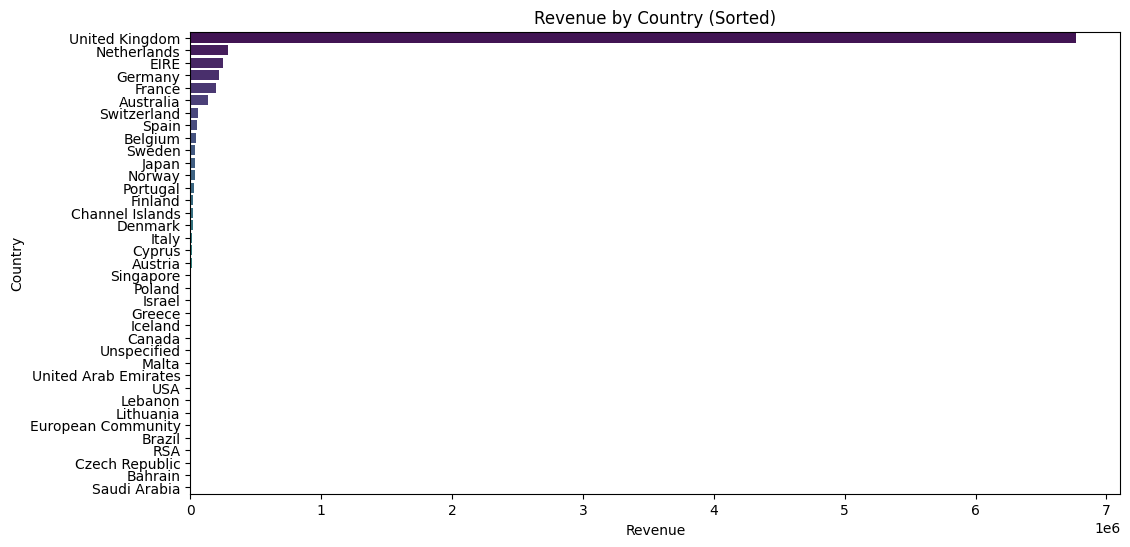

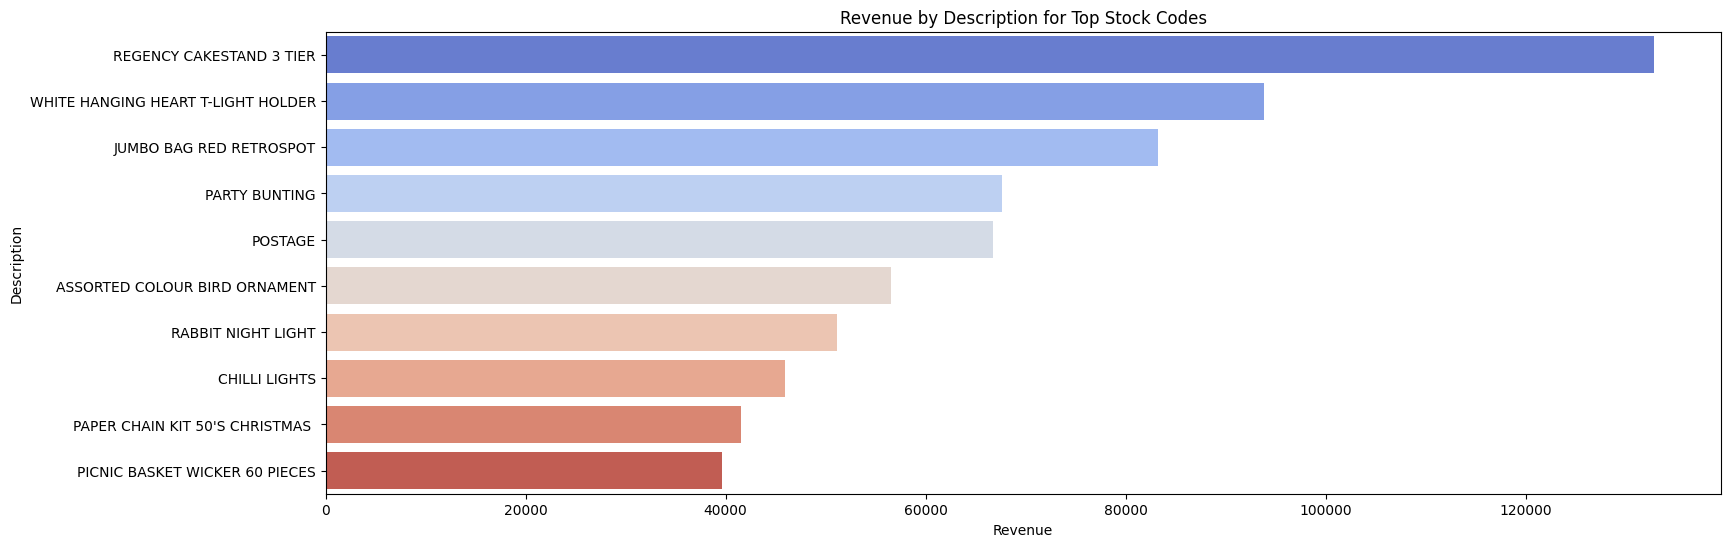

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 14: Revenue by Country - Sorted
country_revenue_sorted = df_cleaned.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(y=country_revenue_sorted.index, x=country_revenue_sorted.values, palette='viridis')
plt.title('Revenue by Country (Sorted)')
plt.xlabel('Revenue')
plt.ylabel('Country')
plt.savefig('revenue_by_country_sorted.png')
plt.show()

# Plot 15: Revenue by Description for Top Stock Codes
top_stock_codes = df_cleaned.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(18, 6))
sns.barplot(y=top_stock_codes.index, x=top_stock_codes.values, palette='coolwarm')
plt.title('Revenue by Description for Top Stock Codes')
plt.xlabel('Revenue')
plt.ylabel('Description')
plt.savefig('revenue_by_description_top_stock_codes.png')
plt.show()

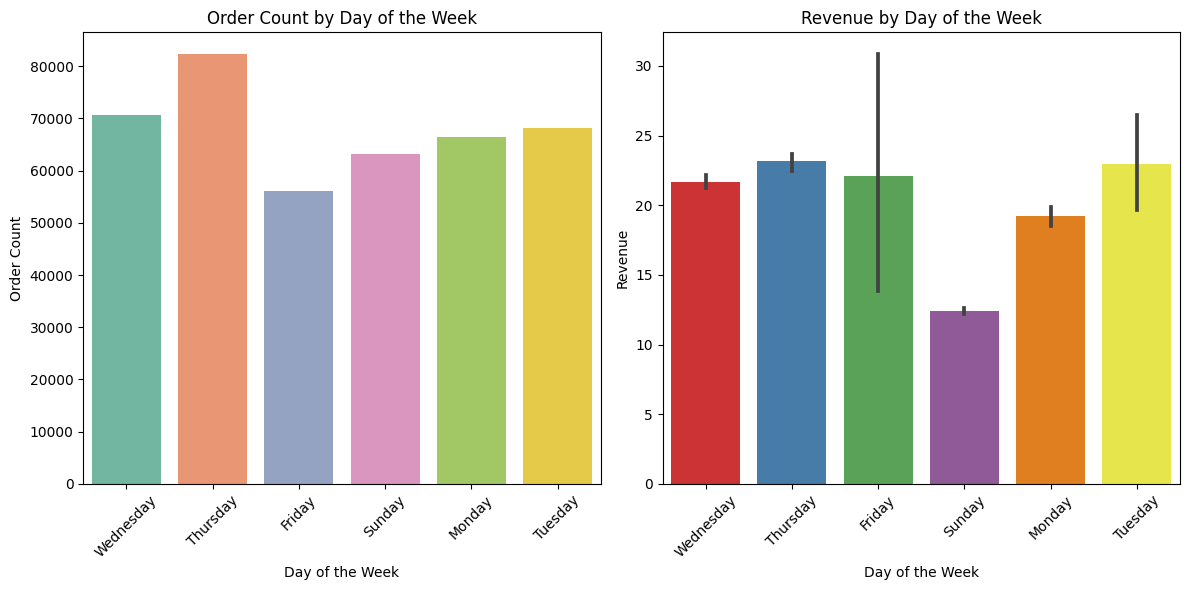

In [ ]:
# Plot Day of the Week Insights
plt.figure(figsize=(12, 6))

# Plot Order Count by Day of the Week
plt.subplot(1, 2, 1)
sns.countplot(data=df_cleaned, x='DayOfWeekName', palette='Set2')
plt.title('Order Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Order Count')
plt.xticks(rotation=45)

# Plot Revenue by Day of the Week
plt.subplot(1, 2, 2)
sns.barplot(data=df_cleaned, x='DayOfWeekName', y='Revenue', palette='Set1')
plt.title('Revenue by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Revenue')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('day_of_week_insights.png')
plt.show()